In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.feature_selection import SelectKBest, f_classif

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import re

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.shape

(891, 12)

In [7]:
df_test.shape

(418, 11)

In [8]:
df = pd.concat([df_train,df_test],sort=False)

In [9]:
df.shape

(1309, 12)

In [10]:
dfd = df

In [11]:
dfd.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
dfd.columns = [a.lower() for a in dfd.columns]

In [13]:
dfd.isna().sum()

passengerid       0
survived        418
pclass            0
name              0
sex               0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
dtype: int64

In [14]:
dfd.cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
dfd.sibsp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [16]:
dfd.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
dfd.shape

(1309, 12)

In [18]:
dfd.passengerid.count()

1309

In [19]:
dfd.sex.unique()

array(['male', 'female'], dtype=object)

In [20]:
labelencoder = LabelEncoder()

In [21]:
dfd['sex'] = labelencoder.fit_transform(dfd['sex'])

In [22]:
dfd.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [23]:
dfd.ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [24]:
dfd.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
dfd.embarked.isna().sum()

2

In [26]:
dfd.embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [27]:
dfd.embarked.mode()

0    S
dtype: object

In [28]:
dfd.embarked.fillna(dfd.embarked.mode()[0],inplace=True)

In [29]:
dfd.embarked.isna().sum()

0

In [30]:
dfd['embarked'] = labelencoder.fit_transform(dfd['embarked'])

In [31]:
dfd.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [32]:
dfd.cabin.isna().sum()

1014

In [33]:
dfd.cabin.mode()

0    C23 C25 C27
dtype: object

In [34]:
dfd.cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [35]:
dfd.cabin.fillna(dfd.cabin.mode()[0],inplace=True)

In [36]:
dfd.parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

In [37]:
dfd.name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [38]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'[^\w]', ' ', text)
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

In [39]:
dfd.name = dfd.name.apply(clean_text)

In [40]:
dfd.name.unique()

array(['braund owen harris',
       'cumings mrs john bradley florence briggs thayer',
       'heikkinen miss laina', ..., 'saether simon sivertsen',
       'ware frederick', 'peter master michael'], dtype=object)

In [41]:
dfd['name_num_words'] = dfd.name.apply(lambda a: len(str(a).split()))

In [42]:
dfd['name_unique_words'] = dfd.name.apply(lambda b : len(set(str(b).split())))

In [43]:
dfd['name_charac_words'] = dfd.name.apply(lambda c: len(str(c)))

In [44]:
dfd['name_mean_word_len'] = dfd.name.apply(lambda h : np.mean([len(a) for a in str(h).split()]))

In [45]:
dfd.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_num_words,name_unique_words,name_charac_words,name_mean_word_len
0,1,0.0,3,braund owen harris,1,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,2,3,3,18,5.333333
1,2,1.0,1,cumings mrs john bradley florence briggs thayer,0,38.0,1,0,PC 17599,71.2833,C85,0,7,7,47,5.857143
2,3,1.0,3,heikkinen miss laina,0,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,2,3,3,20,6.000000
3,4,1.0,1,futrelle mrs jacques heath lily may peel,0,35.0,1,0,113803,53.1000,C123,2,7,7,40,4.857143
4,5,0.0,3,allen william henry,1,35.0,0,0,373450,8.0500,C23 C25 C27,2,3,3,19,5.666667


In [46]:
dfd.isna().sum()

passengerid             0
survived              418
pclass                  0
name                    0
sex                     0
age                   263
sibsp                   0
parch                   0
ticket                  0
fare                    1
cabin                   0
embarked                0
name_num_words          0
name_unique_words       0
name_charac_words       0
name_mean_word_len      0
dtype: int64

In [47]:
dfd.fare.mode()

0    8.05
dtype: float64

In [48]:
dfd.fare.fillna(dfd.fare.mode()[0],inplace=True)

In [49]:
dfd.isna().sum()

passengerid             0
survived              418
pclass                  0
name                    0
sex                     0
age                   263
sibsp                   0
parch                   0
ticket                  0
fare                    0
cabin                   0
embarked                0
name_num_words          0
name_unique_words       0
name_charac_words       0
name_mean_word_len      0
dtype: int64

In [50]:
dfd.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [51]:
dfd.age.mode()

0    24.0
dtype: float64

In [52]:
dfd.age.fillna(dfd.age.mode()[0],inplace=True)

In [53]:
dff = dfd

In [54]:
dff.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,name_num_words,name_unique_words,name_charac_words,name_mean_word_len
0,1,0.0,3,braund owen harris,1,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,2,3,3,18,5.333333
1,2,1.0,1,cumings mrs john bradley florence briggs thayer,0,38.0,1,0,PC 17599,71.2833,C85,0,7,7,47,5.857143
2,3,1.0,3,heikkinen miss laina,0,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,2,3,3,20,6.000000
3,4,1.0,1,futrelle mrs jacques heath lily may peel,0,35.0,1,0,113803,53.1000,C123,2,7,7,40,4.857143
4,5,0.0,3,allen william henry,1,35.0,0,0,373450,8.0500,C23 C25 C27,2,3,3,19,5.666667


In [55]:
cabin_num_col = dff.cabin.str.get_dummies(sep=',')

In [56]:
dff.drop(['name','ticket','fare','cabin'],axis=1,inplace=True)

In [57]:
dff.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,embarked,name_num_words,name_unique_words,name_charac_words,name_mean_word_len
0,1,0.0,3,1,22.0,1,0,2,3,3,18,5.333333
1,2,1.0,1,0,38.0,1,0,0,7,7,47,5.857143
2,3,1.0,3,0,26.0,0,0,2,3,3,20,6.000000
3,4,1.0,1,0,35.0,1,0,2,7,7,40,4.857143
4,5,0.0,3,1,35.0,0,0,2,3,3,19,5.666667


In [58]:
n_dff = pd.concat([dff,cabin_num_col],axis='columns')

In [59]:
n_dff.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,embarked,name_num_words,name_unique_words,...,F E57,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,1,0.0,3,1,22.0,1,0,2,3,3,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,0,7,7,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,2,3,3,...,0,0,0,0,0,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,2,7,7,...,0,0,0,0,0,0,0,0,0,0
4,5,0.0,3,1,35.0,0,0,2,3,3,...,0,0,0,0,0,0,0,0,0,0


In [60]:
n_dff.shape

(1309, 198)

In [61]:
n_dff.isna().sum()

passengerid      0
survived       418
pclass           0
sex              0
age              0
              ... 
F33              0
F38              0
F4               0
G6               0
T                0
Length: 198, dtype: int64

In [62]:
train_preprocessed = n_dff[n_dff['survived'].notna()]

In [63]:
train_preprocessed.shape

(891, 198)

In [64]:
test_preprocessed = n_dff[n_dff['survived'].isna()]

In [65]:
test_preprocessed.shape

(418, 198)

In [66]:
X = train_preprocessed.drop(['survived'],axis = 1)

In [67]:
Y = train_preprocessed['survived']

In [68]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=30)

In [69]:
# scaler = StandardScaler()
# train_x= scaler.fit_transform(train_x)
# test_x = scaler.transform(test_x)

In [70]:
# For choosing the best values/column for the model
svm = SVC()
svm.fit(train_x, train_y)
score_before_scaling = svm.score(test_x, test_y)

train_accuracy = []
k = np.arange(1, 198)

for i in k:
    select = SelectKBest(f_classif, k=i)
    x_train_new = select.fit_transform(train_x, train_y)
    svm.fit(x_train_new, train_y)
    train_accuracy.append(svm.score(x_train_new, train_y))

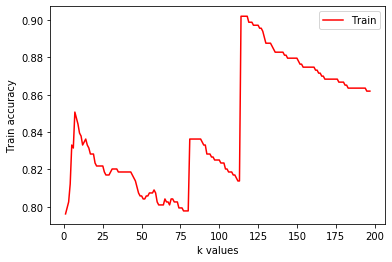

In [71]:
plt.plot(k, train_accuracy, color = 'red', label = 'Train')
plt.xlabel('k values')
plt.ylabel('Train accuracy')
plt.legend()
plt.show()

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(train_x,train_y)

In [ ]:
train_pred = log_reg.predict(train_x)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(train_y,train_pred)

In [ ]:
metrics.accuracy_score(train_y,train_pred)

In [ ]:
test_pred = log_reg.predict(test_x)

In [ ]:
metrics.confusion_matrix(test_y,test_pred)

In [ ]:
metrics.accuracy_score(test_y,test_pred)

In [ ]:
def svc_fn(train, test, train_y, test_y, scaler, Kernel='linear', c=1.0, Degree=2):
    train_x1 = scaler.fit_transform(train)
    test_x1 = scaler.transform(test)
    svc = SVC(kernel=Kernel,degree=Degree)
    svc.fit(train_x1,train_y)
    test_pred = svc.predict(test_x1)
    print("the accuracy score for",Kernel,round(accuracy_score(test_y,test_pred)))

In [ ]:
for i in ['linear','poly','rbf']:
    svc_fn(train_x,test_x, train_y, test_y, StandardScaler(),i)

In [ ]:
model =  GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [281]:
from sklearn.metrics import classification_report
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       160
         1.0       0.81      0.69      0.74       108

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



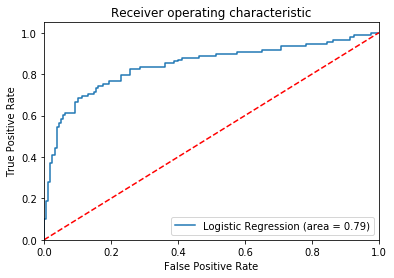

In [282]:


logit_roc_auc = roc_auc_score(test_y, log_reg.predict(test_x))
fpr, tpr, thresholds = roc_curve(test_y, log_reg.predict_proba(test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [283]:
test_hack_predict = log_reg.predict(test_preprocessed.drop(['survived'],axis=1))

In [284]:
test_hack_predict

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [289]:
test_hack_df = pd.DataFrame(test_hack_predict,columns=['Survived'])

In [290]:
result_final = pd.concat([test_preprocessed[['passengerid']],test_hack_df],axis=1)

In [293]:
result_final.columns = ['PassengerId','Survived']

In [297]:
result_final.Survived = result_final.Survived.astype('int')

In [300]:
result_final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [302]:
result = result_final
result.to_csv('outputs/gender_submission.csv',index = False)